# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Type url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and request your results in Imperial Units
query_url = f"{url}appid={weather_api_key}&q=London&units=Imperial"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [7]:
# Show weather json
weather_json

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 61.7,
  'feels_like': 61.81,
  'temp_min': 59.49,
  'temp_max': 63.18,
  'pressure': 1007,
  'humidity': 90},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 257, 'gust': 5.01},
 'clouds': {'all': 75},
 'dt': 1627453694,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1627445901,
  'sunset': 1627502124},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [8]:
# Set count for processing record
record_count = 0
set_count = 1

# Create city list
city_data = []

# Print Statement
print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units=Imperial"
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    record_count += 1
    if (record_count % 50== 0):
        record_count = 0
        set_count += 1 
    
    # Try statement for parameters needed for dataframe
    try:
        longitude = weather_json["coord"]["lon"]
        latitude = weather_json["coord"]["lat"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        windiness = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        city_data.append({"City": city,
                          "Lat": latitude,
                            "Lng": longitude,
                            "Max Temp": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": cloud,
                            "Wind Speed": windiness,
                            "Country": country,
                            "Date": date,
                            })
        
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except:
        print("City not found. Skipping...")
        record_count = record_count - 1
        pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | yaan
Processing Record 2 of Set 1 | paamiut
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | vardo
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | murowana goslina
Processing Record 8 of Set 1 | vaitape
Processing Record 9 of Set 1 | acapulco
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | loralai
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | mokhsogollokh
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | dongsheng
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | xinzhou
Processing Record 18 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 19 of Set 1 | corum
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | aksu
Processing Record 22 of Set 1 | luderitz
City not found. Skipping...
City n

Processing Record 41 of Set 4 | terrassa
Processing Record 42 of Set 4 | strathmore
Processing Record 43 of Set 4 | comodoro rivadavia
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | tabou
City not found. Skipping...
Processing Record 47 of Set 4 | nguruka
Processing Record 48 of Set 4 | wanaka
Processing Record 49 of Set 4 | carnarvon
Processing Record 0 of Set 5 | itaquyry
Processing Record 1 of Set 5 | kokopo
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | anori
City not found. Skipping...
Processing Record 4 of Set 5 | sibolga
Processing Record 5 of Set 5 | krasnoselkup
Processing Record 6 of Set 5 | havre-saint-pierre
Processing Record 7 of Set 5 | broome
Processing Record 8 of Set 5 | alenquer
Processing Record 9 of Set 5 | fukue
City not found. Skipping...
Processing Record 10 of Set 5 | hailar
Processing Record 11 of Set 5 | chimbote
Processing Record 12 of Set 5 | kargil

Processing Record 24 of Set 8 | beroroha
Processing Record 25 of Set 8 | west wendover
Processing Record 26 of Set 8 | omboue
Processing Record 27 of Set 8 | lorengau
Processing Record 28 of Set 8 | kindu
Processing Record 29 of Set 8 | ballarat
Processing Record 30 of Set 8 | puerto ayacucho
Processing Record 31 of Set 8 | araouane
Processing Record 32 of Set 8 | kahului
City not found. Skipping...
Processing Record 33 of Set 8 | chake chake
Processing Record 34 of Set 8 | ponta do sol
Processing Record 35 of Set 8 | tura
Processing Record 36 of Set 8 | cartagena
Processing Record 37 of Set 8 | karasjok
Processing Record 38 of Set 8 | isla mujeres
City not found. Skipping...
Processing Record 39 of Set 8 | velden am worthersee
Processing Record 40 of Set 8 | wajima
Processing Record 41 of Set 8 | roseburg
Processing Record 42 of Set 8 | pafos
Processing Record 43 of Set 8 | kloulklubed
Processing Record 44 of Set 8 | crotone
Processing Record 45 of Set 8 | verkhnevilyuysk
Processing R

Processing Record 12 of Set 12 | rypefjord
Processing Record 13 of Set 12 | eyl
Processing Record 14 of Set 12 | moose jaw
Processing Record 15 of Set 12 | shache
Processing Record 16 of Set 12 | piacabucu
Processing Record 17 of Set 12 | freeport
Processing Record 18 of Set 12 | rockland
Processing Record 19 of Set 12 | sechura
Processing Record 20 of Set 12 | xiangxiang
Processing Record 21 of Set 12 | aberdeen
Processing Record 22 of Set 12 | dinghai
City not found. Skipping...
Processing Record 23 of Set 12 | emba
Processing Record 24 of Set 12 | birao
Processing Record 25 of Set 12 | sovetskiy
Processing Record 26 of Set 12 | namikupa
Processing Record 27 of Set 12 | rabo de peixe
Processing Record 28 of Set 12 | lukovetskiy
Processing Record 29 of Set 12 | stanceni
Processing Record 30 of Set 12 | port-gentil
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create Dataframe
city_df = pd.DataFrame(city_data)

# Display head of dataframe
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yaan,7.3833,8.5667,69.87,90,99,3.76,NG,1627453711
1,paamiut,61.9940,-49.6678,44.46,82,83,9.13,GL,1627453712
2,iqaluit,63.7506,-68.5145,42.53,81,75,5.01,CA,1627453712
3,mataura,-46.1927,168.8643,48.47,93,89,2.55,NZ,1627453712
4,vardo,70.3705,31.1107,50.20,93,75,10.36,NO,1627453713


In [10]:
# Export city data to csv
city_df.to_csv(output_data_file, index = False)

In [11]:
# Describe dataframe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.00000,580.000000,580.000000,580.000000,5.800000e+02
mean,21.130364,18.164980,70.28431,68.998276,56.044828,8.085345,1.627454e+09
std,32.822574,89.279504,14.24640,21.852900,39.902576,5.739437,9.605413e+01
min,-54.800000,-179.166700,33.40000,10.000000,0.000000,0.000000,1.627453e+09
25%,-5.229925,-57.642200,60.74250,53.750000,11.750000,3.737500,1.627454e+09
50%,24.816650,22.712450,71.88000,75.000000,75.000000,6.910000,1.627454e+09
75%,48.204275,93.529200,80.71750,87.000000,98.000000,10.365000,1.627454e+09
max,78.218600,179.316700,101.53000,100.000000,100.000000,34.670000,1.627454e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Inspect if there are cities with Humidity > 100%
city_df.loc[city_df["Humidity"] > 100, :]
# In this random draw of cities, there were no cities with humidity greater than 100.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
# Skip

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# skip

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Skip

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

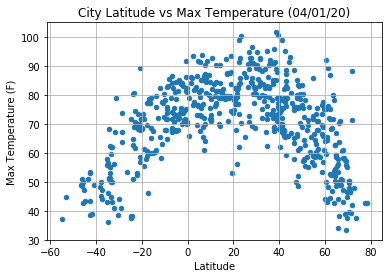

In [13]:
city_df.plot(x = "Lat", y = "Max Temp", kind = "scatter", title = "City Latitude vs Max Temperature (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

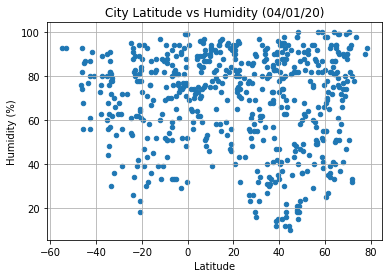

In [14]:
city_df.plot(x = "Lat", y = "Humidity", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

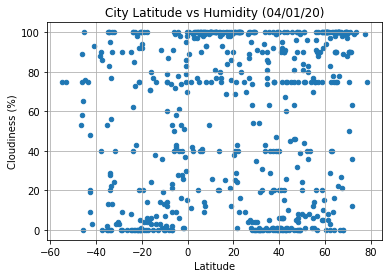

In [16]:
city_df.plot(x = "Lat", y = "Cloudiness", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

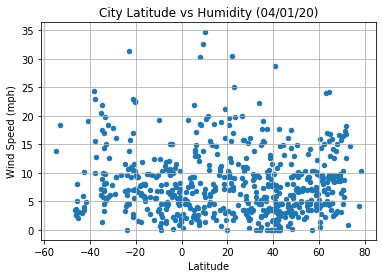

In [17]:
city_df.plot(x = "Lat", y = "Wind Speed", kind = "scatter", title = "City Latitude vs Humidity (04/01/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Lat_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [18]:
# Create dataframe of Northern and Southern Hemisphere
northern_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float)>0,:]
southern_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float)<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6186050525344651


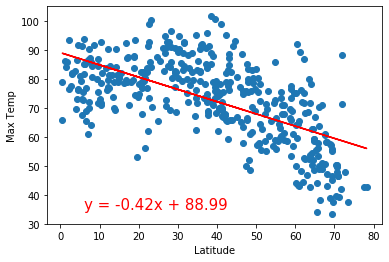

In [20]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern_Lat_vs_MaxTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7747814737264505


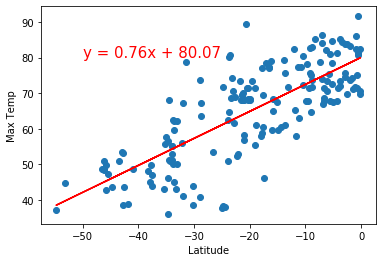

In [21]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern_Lat_vs_MaxTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.07892448485584524


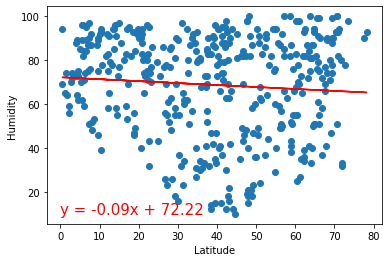

In [24]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern_Lat_vs_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.04160793665015647


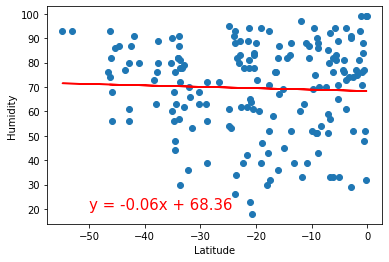

In [25]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern_Lat_vs_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.06769640372906989


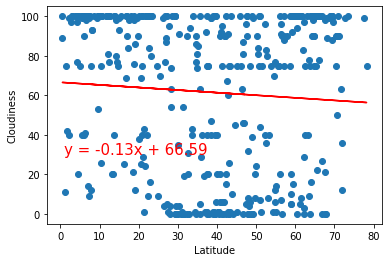

In [29]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern_Lat_vs_Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.050503733886829084


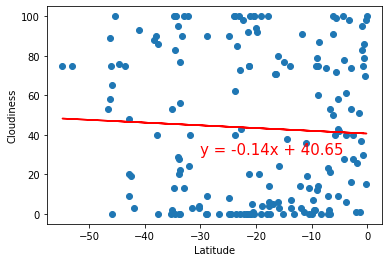

In [30]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern_Lat_vs_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.04205163470902952


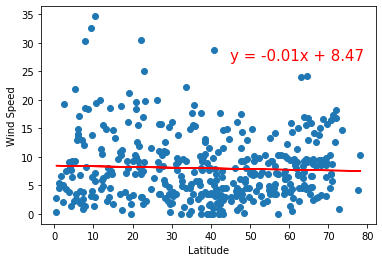

In [33]:
# Add the linear regression equation and line to plot
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern_Lat_vs_WindSpeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23680034571336542


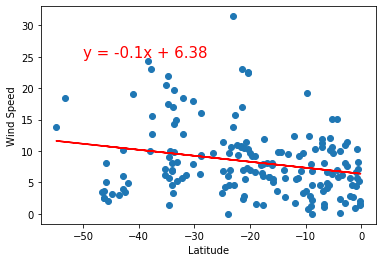

In [35]:
# Add the linear regression equation and line to plot
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern_Lat_vs_WindSpeed.png")
plt.show()